# Factors that Influence the risk of Heart Attack in Men :

AGE: Dropped 21 rows due to special codes.
HOURSWRK: Dropped 38 rows due to special codes.
BMICALC: Dropped 923 rows due to special codes.
VIG10DMIN: Dropped 32 rows due to special codes.
VEGENO: Dropped 492 rows due to special codes.
SALSAMNO: Dropped 15 rows due to special codes.
SODAPNO: Dropped 14 rows due to special codes.

Best Parameters Found:
Linear SVM: {'C': 0.1}
Polynomial SVM: {'C': 0.1, 'degree': 4}
RBF SVM: {'C': 100, 'gamma': 1}

Model Accuracies:
Linear SVM Accuracy: 0.667572463768116
Polynomial SVM Accuracy: 0.8058574879227053
RBF SVM Accuracy: 0.8200483091787439

Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      3131
           1       0.12      0.78      0.21       181

    accuracy                           0.67      3312
   macro avg       0.55      0.72      0.50      3312
weighted avg       0.93      0.67      0.76      3312


Classification Report (Polynomial SVM):
       

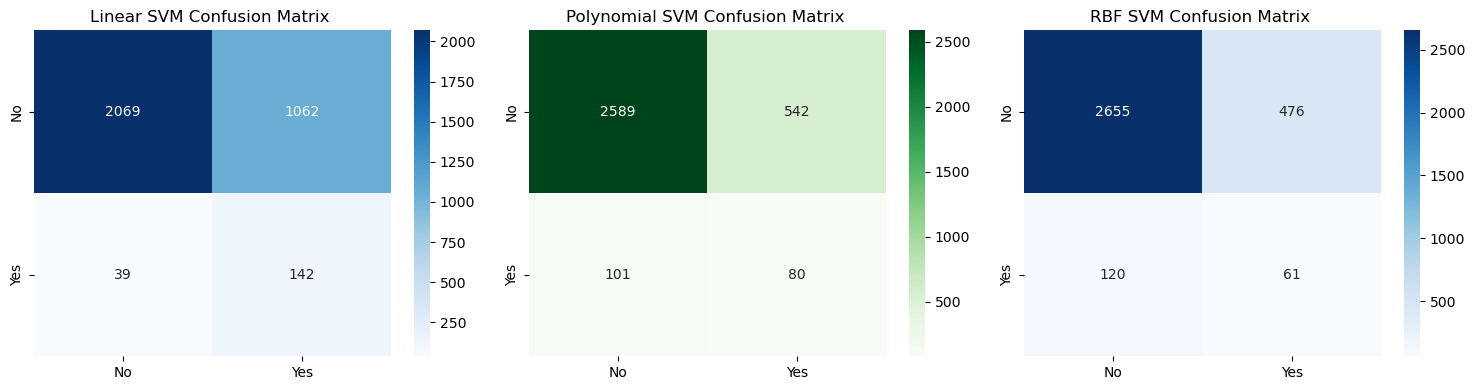

<timed exec>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



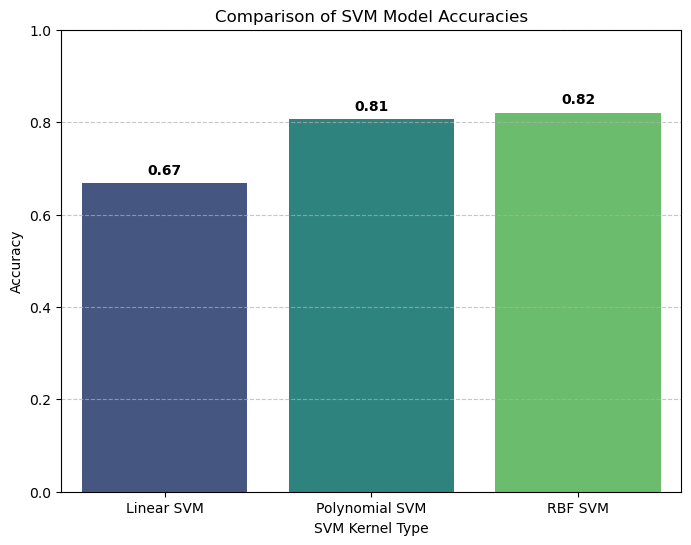

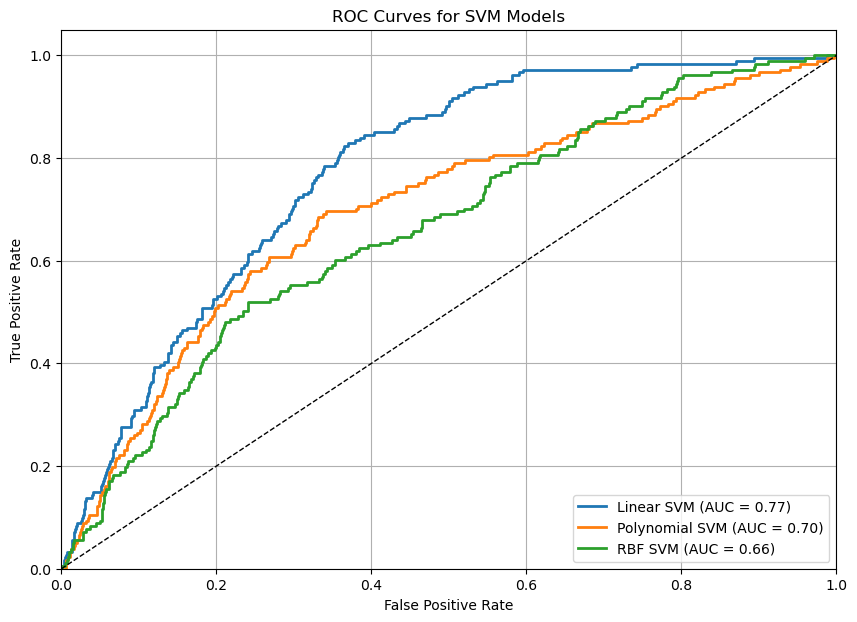


Top Features Based on Linear SVM Coefficients:
     Feature  Coefficient  AbsCoefficient
0        AGE     0.699215        0.699215
1   HOURSWRK    -0.515857        0.515857
3  VIG10DMIN    -0.110465        0.110465
2    BMICALC     0.067644        0.067644
6    SODAPNO     0.020983        0.020983
5   SALSAMNO    -0.017923        0.017923
4     VEGENO     0.011984        0.011984


<timed exec>:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



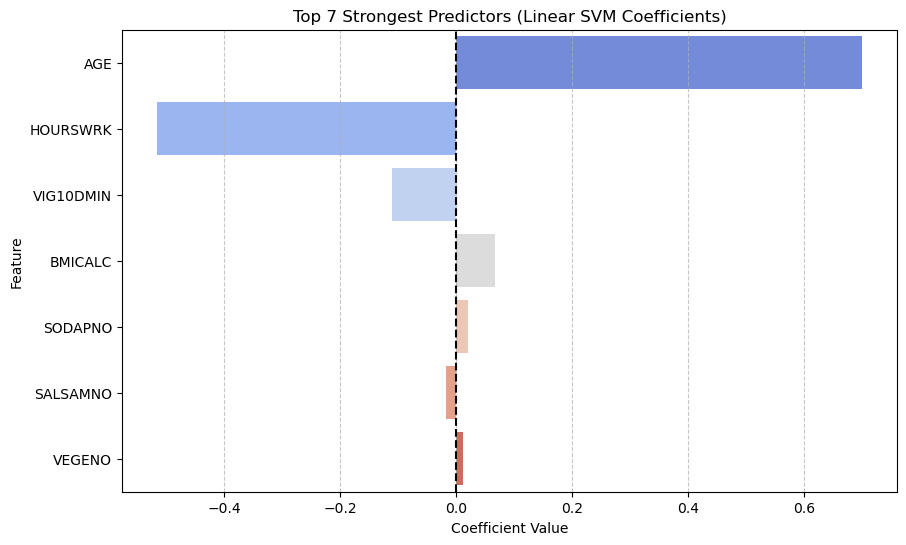

C:\Users\missi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


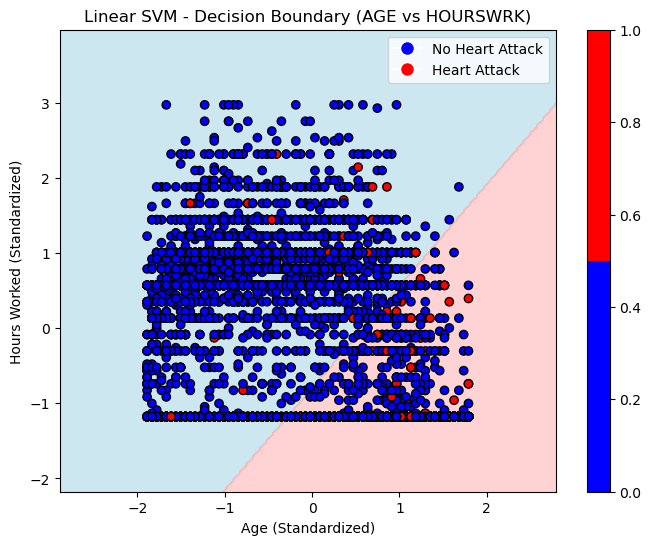

C:\Users\missi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


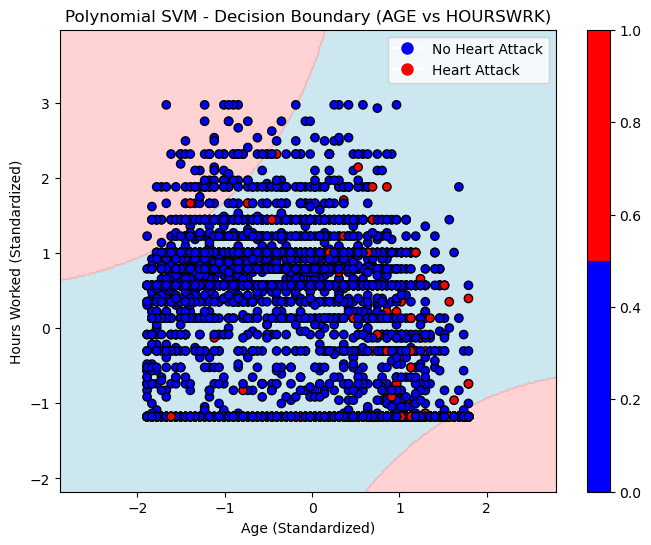

C:\Users\missi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


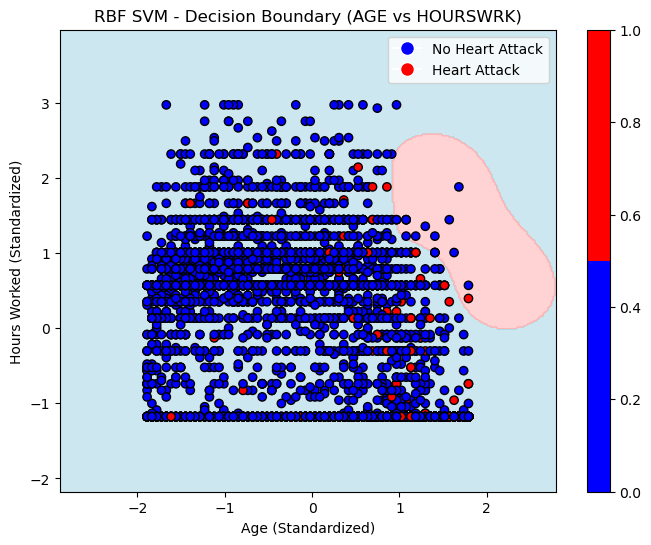

CPU times: total: 2min 40s
Wall time: 2min 51s


In [17]:
%%time
# Importing required libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

# Loading the dataset :
df = pd.read_csv(r"C:\Users\missi\Downloads\nhis_2022.csv")

# Subsetting only Male :
df = df[df['SEX'] == 1]

# Choosing Heart Attack as Target Variable or Disease to be predicted for the Task:
target = 'HEARTATTEV'  # From the CodeBook Heart Attack (1=No, 2=Yes )

# Choosing 7 Feature variables from 48 :
features = [ 'AGE', 'HOURSWRK', 'BMICALC', 'VIG10DMIN',  'VEGENO','SALSAMNO', 'SODAPNO']

# Checking for Null Values in Features :
df[features].isnull().sum()

# Keeping values in Heart Attack that belong to class 1=No, 2=Yes :
df = df[df[target].isin([1, 2])]

# Special Codes for Features in a Dictionary :
special_codes = { 'AGE': [997, 998, 999],
                 'HOURSWRK': [97, 98, 99],
                 'BMICALC': [0.0, 996.0],
                 'VIG10DMIN': [996, 997, 998, 999],
                 'VEGENO': [995, 996, 997, 998, 999],
                 'SALSAMNO': [996, 997, 998, 999],
                 'SODAPNO': [996, 997, 998, 999]}

# Dropping special codes rows :
for col, bad_values in special_codes.items():
    initial_shape = df.shape[0]
    df = df[~df[col].isin(bad_values)] # Keeping the compliment of all the special codes
    final_shape = df.shape[0]
    print(f"{col}: Dropped {initial_shape - final_shape} rows due to special codes.")

# Clean Dataframe with Features + Target :
df_clean = df[features + [target]].copy()

# Encoding target : 1 -> 0 (No Heart Attack), 2 -> 1 ( Heart Attack)
df_clean[target] = df_clean[target].map({1: 0, 2: 1})

# Scaling all the features to a Standard format:
scaler = StandardScaler()
df_clean[features] = scaler.fit_transform(df_clean[features])

# Splitting into train and test data :
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tuning parameters stored in dictionary :
param_grid_linear = {'C': [0.01, 0.1, 1, 10]}
param_grid_poly = {'C': [0.01, 0.1, 1, 10], 'degree': [2, 3, 4]}
param_grid_rbf = {'C': [0.1, 1, 10, 100],'gamma': ['scale', 0.01, 0.1, 1]}

# 1) Linear SVM - Building a balanced Linear Model and using 3-Fold cross validation to obtain the Best Parameters for the Best Model :
grid_linear = GridSearchCV(SVC(kernel='linear', class_weight='balanced', random_state=12),param_grid_linear,cv=3)
grid_linear.fit(X_train, y_train)

# 2) Polynomial SVM - Building a balanced Polynomial Model and using 3-Fold cross validation to obtain the Best Parameters for the Best Model :
grid_poly = GridSearchCV(SVC(kernel='poly',class_weight='balanced', random_state=12), param_grid_poly, cv=3)
grid_poly.fit(X_train, y_train)

# 3) RBF SVM - Building a balanced Radial Model and using 3-Fold cross validation to obtain the Best Parameters for the Best Model :
grid_rbf = GridSearchCV(SVC(kernel='rbf',class_weight='balanced', random_state=21), param_grid_rbf, cv=3)
grid_rbf.fit(X_train, y_train)

# Best Models obtained from the Cross Validation Results for Linear , Polynomial and Radial :
best_linear = grid_linear.best_estimator_
best_poly = grid_poly.best_estimator_
best_rbf = grid_rbf.best_estimator_

# Predictions for Linear , Polynomial and Radial Models :
y_pred_linear = best_linear.predict(X_test)
y_pred_poly = best_poly.predict(X_test)
y_pred_rbf = best_rbf.predict(X_test)

# Printing the Best Parameters extracted from Cross Validation Results for Linear , Polynomial and Radial:
print("\nBest Parameters Found:")
print("Linear SVM:", grid_linear.best_params_)
print("Polynomial SVM:", grid_poly.best_params_)
print("RBF SVM:", grid_rbf.best_params_)

# Printing the Accuracies for Linear , Polynomial and Radial Models:
print("\nModel Accuracies:")
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Polynomial SVM Accuracy:", accuracy_score(y_test, y_pred_poly))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

# Classification reports for Linear , Polynomial and Radial Models:
print("\nClassification Report (Linear SVM):")
print(classification_report(y_test, y_pred_linear))

print("\nClassification Report (Polynomial SVM):")
print(classification_report(y_test, y_pred_poly))

print("\nClassification Report (RBF SVM):")
print(classification_report(y_test, y_pred_rbf))



# Plotting Confusion matrices for Linear , Polynomial and Radial Models using the actual Test Target values and Predicted Test Values :
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(15, 4))
plt.subplot(131)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Linear SVM Confusion Matrix ')

plt.subplot(132)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Polynomial SVM Confusion Matrix ')

plt.subplot(133)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('RBF SVM Confusion Matrix ')

plt.tight_layout()
plt.show()



# Plotting the Comparision of Accuracies :
linear_acc = accuracy_score(y_test, y_pred_linear)
poly_acc = accuracy_score(y_test, y_pred_poly)
rbf_acc = accuracy_score(y_test, y_pred_rbf)
accuracy_dict = {'Linear SVM': linear_acc,'Polynomial SVM': poly_acc,'RBF SVM': rbf_acc}
plt.figure(figsize=(8,6))
sns.barplot(
    x=list(accuracy_dict.keys()),
    y=list(accuracy_dict.values()),
    palette='viridis')
plt.ylim(0, 1) 
plt.title('Comparison of SVM Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('SVM Kernel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(list(accuracy_dict.values())):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()



# ROC - CURVE :
# Decision Function scores-the distances from the Hyperplane to plot ROC
y_scores_linear = best_linear.decision_function(X_test)
y_scores_poly = best_poly.decision_function(X_test)
y_scores_rbf = best_rbf.decision_function(X_test)

# Computing ROC curve and AUC score for each Model :
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_scores_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_poly, tpr_poly, _ = roc_curve(y_test, y_scores_poly)
roc_auc_poly = auc(fpr_poly, tpr_poly)

fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_scores_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(10, 7))
plt.plot(fpr_linear, tpr_linear, label=f'Linear SVM (AUC = {roc_auc_linear:.2f})', linewidth=2)
plt.plot(fpr_poly, tpr_poly, label=f'Polynomial SVM (AUC = {roc_auc_poly:.2f})', linewidth=2)
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF SVM (AUC = {roc_auc_rbf:.2f})', linewidth=2)

#  Diagonal Reference Line :
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()



# Coefficients to find the Strong Predictors using Linear SVM :
coefficients = best_linear.coef_.flatten()  # Extracting the coefficients from the Linear Best Model
feature_names = X_train.columns
# Putting the Feature names to their respective coefficient values in a Dataframe
coef_df = pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients}) 
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values(by='AbsCoefficient', ascending=False) # Sorting in Descending Order 
print("\nTop Features Based on Linear SVM Coefficients:")
print(coef_df_sorted)
# Plotting the Strong Predictors in Descending Order :
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_sorted.head(7), palette='coolwarm')
plt.title('Top 7 Strongest Predictors (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



# Plotting the SVM Models for 2 Strong Predictors - AGE and HOURSWRK :
feat1 = 'AGE'
feat2 = 'HOURSWRK'
fixed_feats = ['BMICALC', 'VIG10DMIN', 'VEGENO', 'SALSAMNO', 'SODAPNO']

# Creating a mesh grid to plot the two features :
x_min, x_max = X_train[feat1].min() - 1, X_train[feat1].max() + 1
y_min, y_max = X_train[feat2].min() - 1, X_train[feat2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Fixed the other 5 features to their mean values :
fixed_values = X_train[fixed_feats].mean().values
grid_points = np.c_[xx.ravel(), yy.ravel()] # Combination of AGE and HOURSWRK points
fixed_matrix = np.tile(fixed_values, (grid_points.shape[0], 1))
full_input = np.hstack((grid_points[:, :2], fixed_matrix))  # All features are stored here compatible format for the model 

# 1) Linear SVM Decision Boundary : Predict the AGE and HOURSWRK combo points using trained best model :
Z = best_linear.predict(full_input)
Z = Z.reshape(xx.shape)
# Plot the Linear Model decision boundary for the AGE vs HOURSWRK :
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=ListedColormap(['#add8e6', '#ffb6b6'])) # The coloured regions of red and blue which forms the decision boundary too
plt.scatter(X_train[feat1], X_train[feat2], c=y_train, edgecolors='k', cmap=ListedColormap(['blue', 'red']))
plt.xlabel('Age (Standardized)')
plt.ylabel('Hours Worked (Standardized)')
plt.title('Linear SVM - Decision Boundary (AGE vs HOURSWRK)')
plt.colorbar()
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Heart Attack')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Heart Attack')
plt.legend(handles=[blue_patch, red_patch])
plt.show()

# 2) Polynomial SVM Decision Boundary
Z_poly = best_poly.predict(full_input)
Z_poly = Z_poly.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_poly, alpha=0.6, cmap=ListedColormap(['#add8e6', '#ffb6b6']))
plt.scatter(X_train[feat1], X_train[feat2], c=y_train, edgecolors='k', cmap=ListedColormap(['blue', 'red']))
plt.xlabel('Age (Standardized)')
plt.ylabel('Hours Worked (Standardized)')
plt.title('Polynomial SVM - Decision Boundary (AGE vs HOURSWRK)')
plt.colorbar()
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Heart Attack')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Heart Attack')
plt.legend(handles=[blue_patch, red_patch])
plt.show()


# 3) RBF SVM Decision Boundary
Z_rbf = best_rbf.predict(full_input)
Z_rbf = Z_rbf.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_rbf, alpha=0.6, cmap=ListedColormap(['#add8e6', '#ffb6b6']))
plt.scatter(X_train[feat1], X_train[feat2], c=y_train, edgecolors='k', cmap=ListedColormap(['blue', 'red']))
plt.xlabel('Age (Standardized)')
plt.ylabel('Hours Worked (Standardized)')
plt.title('RBF SVM - Decision Boundary (AGE vs HOURSWRK)')
plt.colorbar()
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Heart Attack')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Heart Attack')
plt.legend(handles=[blue_patch, red_patch])
plt.show()
